In [2]:
import pandas as pd
import numpy as np
import time

dataset_process = pd.read_csv("Base de dados_2_KNN.csv", delimiter=';')

X = dataset_process.loc[: , dataset_process.columns != 'Risk'].values

#XPCA = X.loc[: , dataset_process.columns != 'model'].values
y = dataset_process["Risk"].values

len(dataset_process.columns)

24

In [3]:
display(dataset_process)

,machineID,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,...,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,model,age,failure,failed,RUL_I,Risk
0,1,167,171.64,449.72,102.23,41.19,13.48,36.65,10.39,5.79,...,1.86,8.31,1.27,3.64,model3,18,none,0,74,low
1,1,168,166.01,437.82,101.38,39.62,15.91,47.27,9.80,4.71,...,3.20,11.81,0.54,3.86,model3,18,none,0,73,low
2,1,169,165.02,455.03,98.69,42.45,14.88,39.88,8.41,5.27,...,3.83,8.93,1.33,3.52,model3,18,none,0,72,low
3,1,170,167.47,430.98,101.78,39.30,15.25,55.78,9.42,4.15,...,3.91,12.24,1.38,1.43,model3,18,none,0,71,low
4,1,171,168.92,440.11,98.12,38.21,13.50,58.61,8.67,3.77,...,2.60,9.61,1.89,1.67,model3,18,none,0,70,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,100,245,172.08,434.49,100.52,37.93,14.07,42.00,9.27,4.27,...,2.26,14.81,1.43,1.10,model4,5,none,0,4,high
7185,100,246,174.04,455.28,100.68,40.72,15.31,48.36,8.23,4.75,...,2.66,12.50,0.91,1.03,model4,5,none,0,3,high
7186,100,247,183.57,461.62,99.72,41.28,19.68,61.83,7.93,5.28,...,6.26,13.29,0.97,1.32,model4,5,none,0,2,high
7187,100,248,194.75,457.27,99.58,40.43,11.45,36.93,7.62,4.92,...,11.00,10.71,0.90,1.29,model4,5,none,0,1,high


In [4]:
dataset_process.drop("model",axis=1,inplace=True)
dataset_process.drop("machineID",axis=1,inplace=True)
dataset_process.drop("time_in_cycles",axis=1,inplace=True)
dataset_process.drop("failure",axis=1,inplace=True)
dataset_process.drop("failed",axis=1,inplace=True)
dataset_process.drop("RUL_I",axis=1,inplace=True)
dataset_process.head
X = dataset_process.loc[: , dataset_process.columns != 'Risk'].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
len(X_train)

5751

In [8]:
len(X_test)

1438

In [9]:
from sklearn.neural_network import MLPClassifier

In [16]:
rede_neural=MLPClassifier(verbose=True,tol=0.00001, activation='relu')
rede_neural.fit(X_train,y_train)

Iteration 1, loss = 8.85960106
Iteration 2, loss = 2.65255046
Iteration 3, loss = 2.03818034
Iteration 4, loss = 1.76224261
Iteration 5, loss = 1.64954430
Iteration 6, loss = 1.59946785
Iteration 7, loss = 1.59424822
Iteration 8, loss = 1.64360777
Iteration 9, loss = 1.44889247
Iteration 10, loss = 1.38734635
Iteration 11, loss = 1.37442787
Iteration 12, loss = 1.30569791
Iteration 13, loss = 1.36814173
Iteration 14, loss = 1.40589059
Iteration 15, loss = 1.38718665
Iteration 16, loss = 1.32990013
Iteration 17, loss = 1.34034930
Iteration 18, loss = 1.24002940
Iteration 19, loss = 1.35334256
Iteration 20, loss = 1.26391986
Iteration 21, loss = 1.39994198
Iteration 22, loss = 1.31854446
Iteration 23, loss = 1.25020553
Iteration 24, loss = 1.22735557
Iteration 25, loss = 1.21245940
Iteration 26, loss = 1.18392491
Iteration 27, loss = 1.29940796
Iteration 28, loss = 1.35614920
Iteration 29, loss = 1.15381794
Iteration 30, loss = 1.15224207
Iteration 31, loss = 1.14784950
Iteration 32, los

MLPClassifier(tol=1e-05, verbose=True)

In [18]:
from sklearn.metrics import confusion_matrix
y_pred = rede_neural.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 55, 232,  86],
       [ 29, 221,  91],
       [ 74, 446, 204]], dtype=int64)

Text(60.0, 0.5, 'Truth')

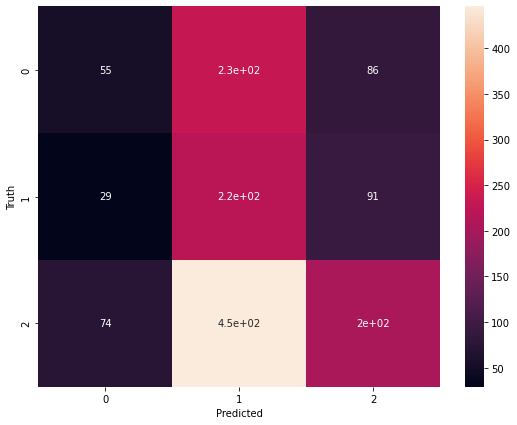

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(9,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.35      0.15      0.21       373
intermediate       0.25      0.65      0.36       341
         low       0.54      0.28      0.37       724

    accuracy                           0.33      1438
   macro avg       0.38      0.36      0.31      1438
weighted avg       0.42      0.33      0.32      1438



In [21]:
rede_neural.score(X_test, y_test)

0.3337969401947149